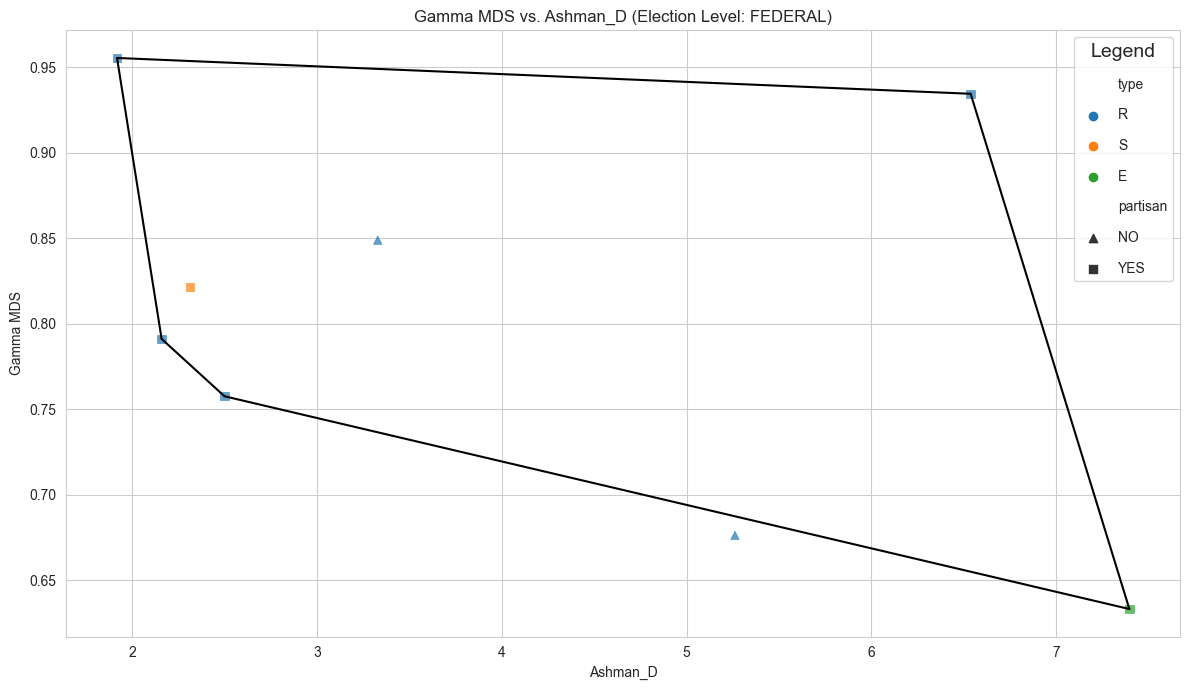

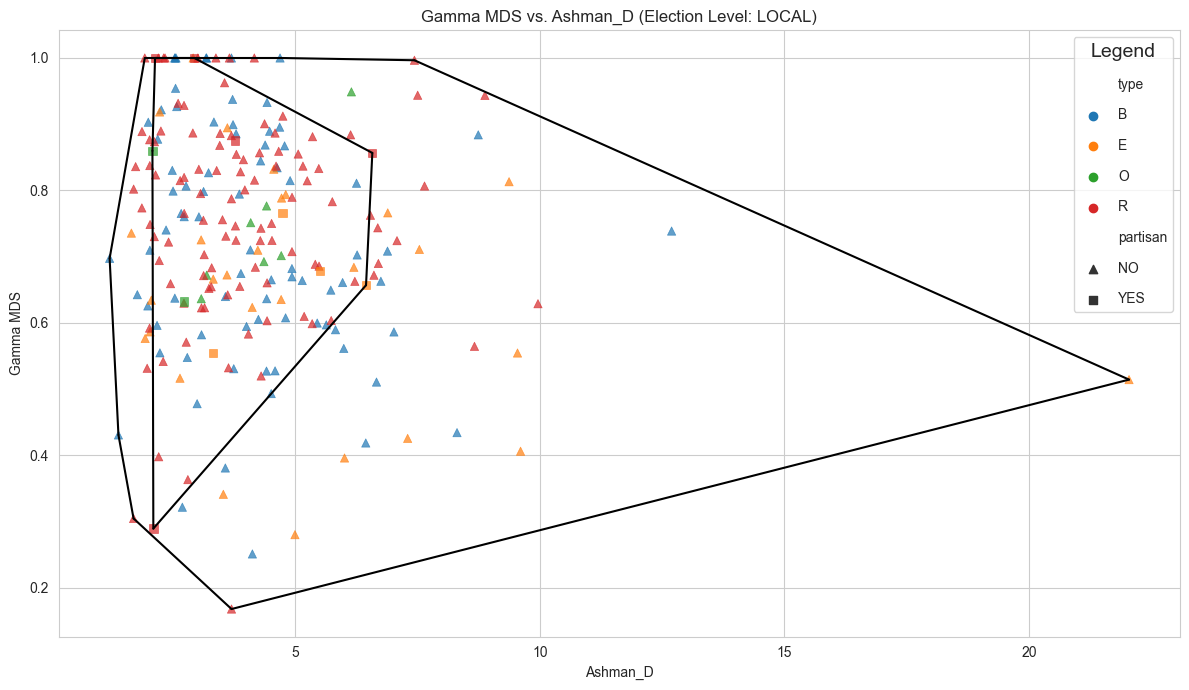

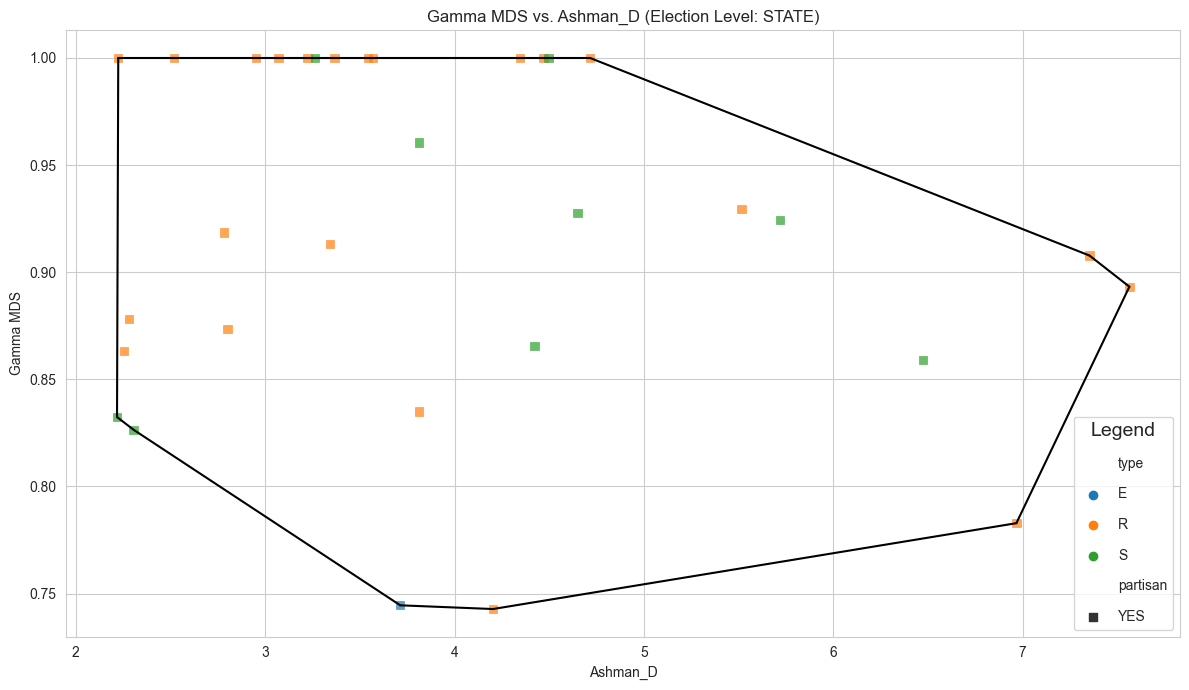

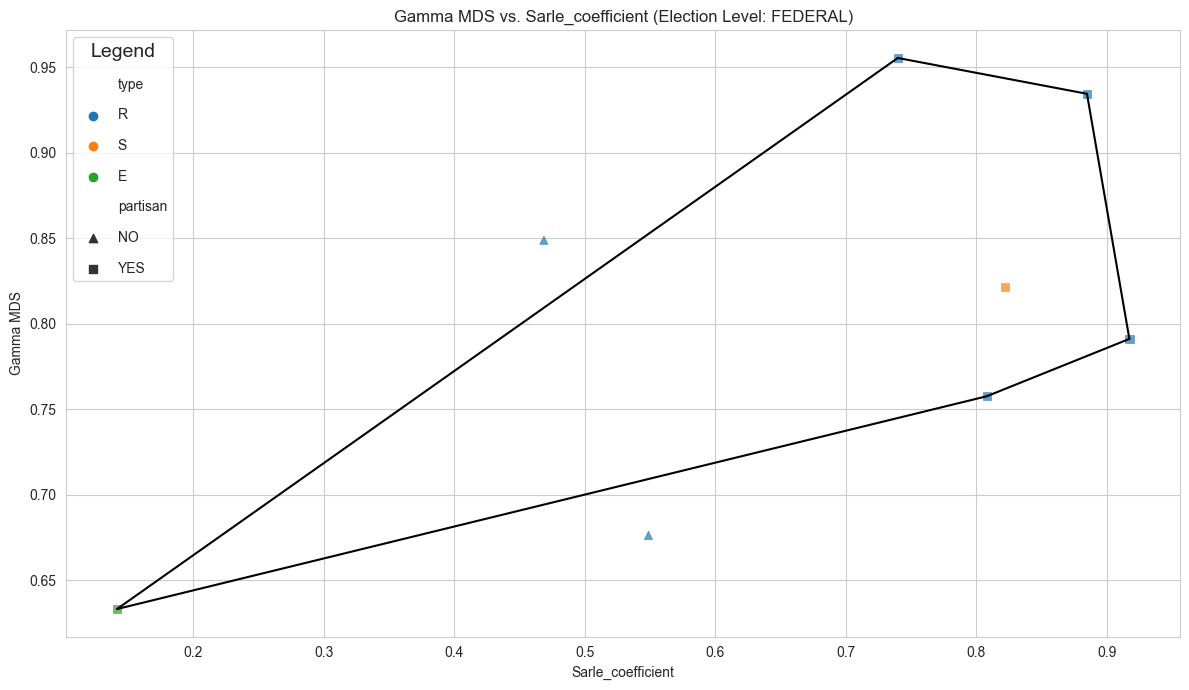

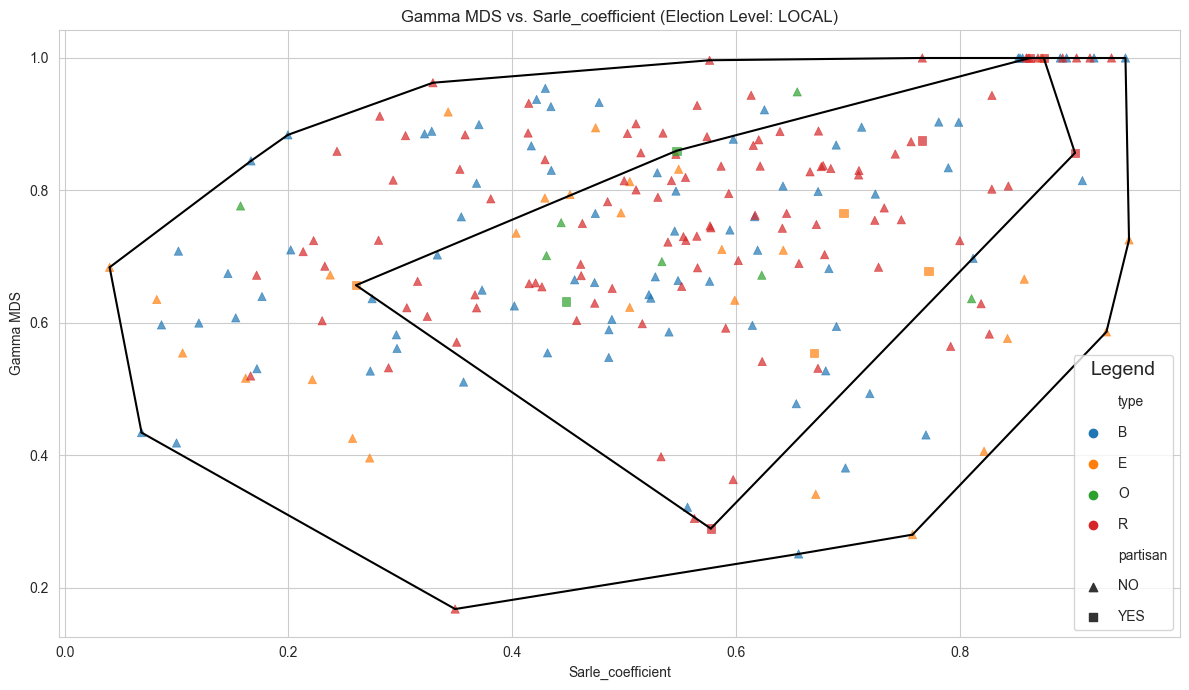

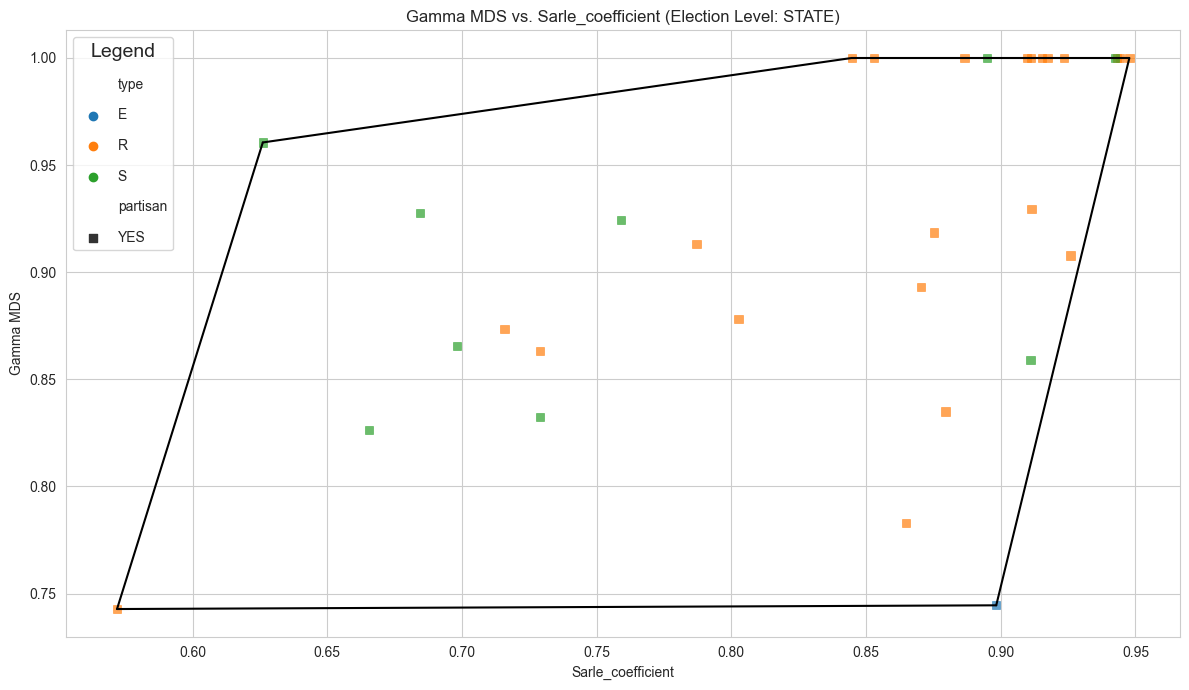

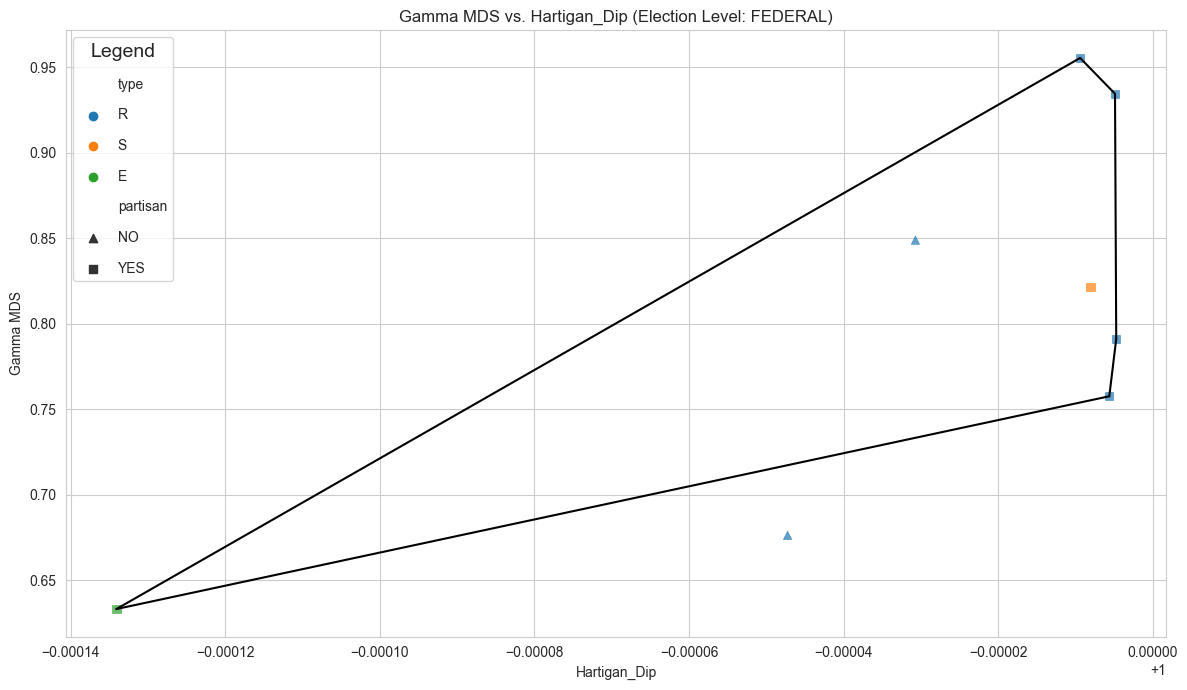

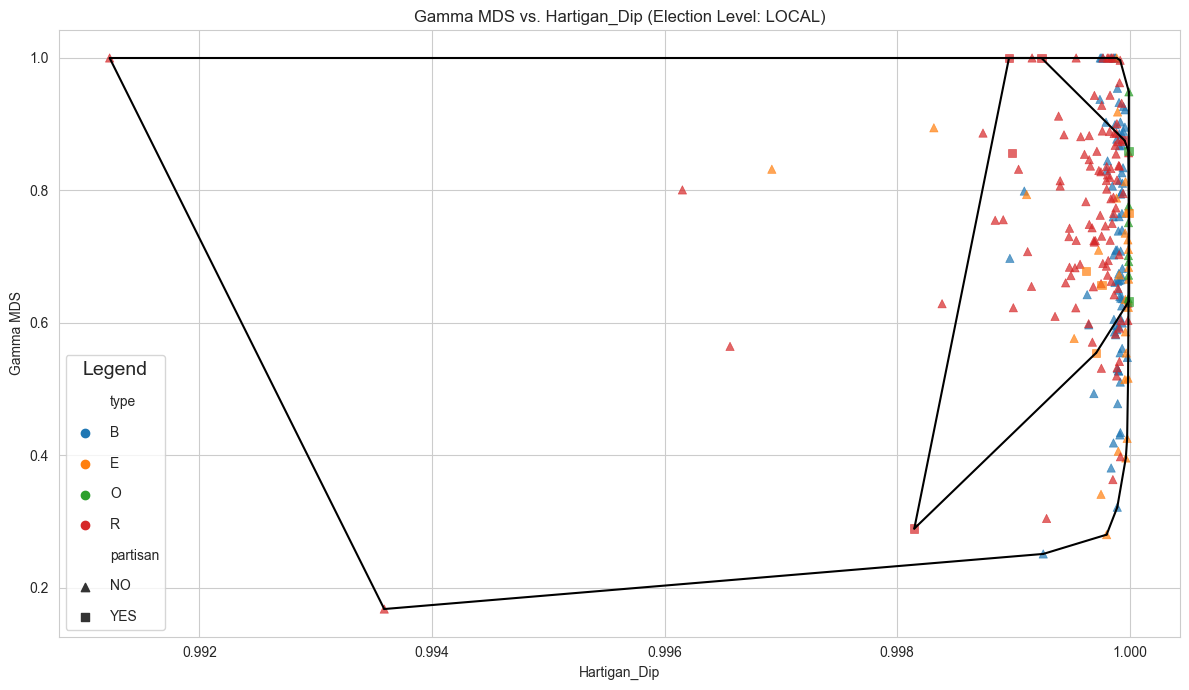

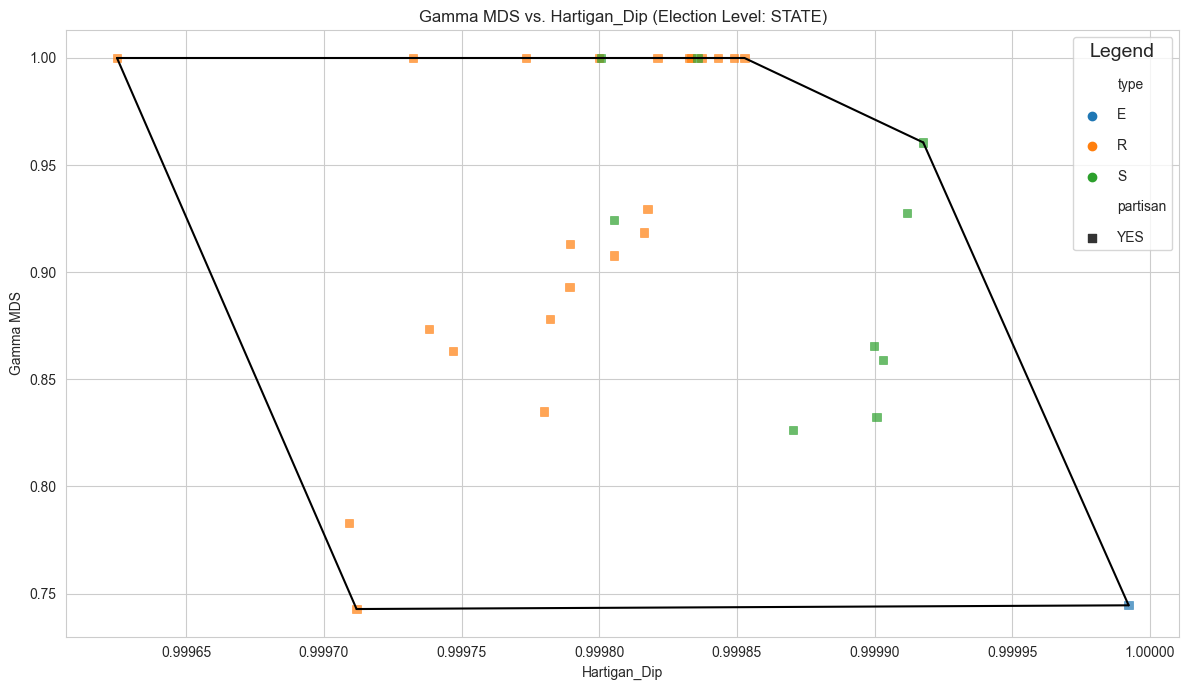

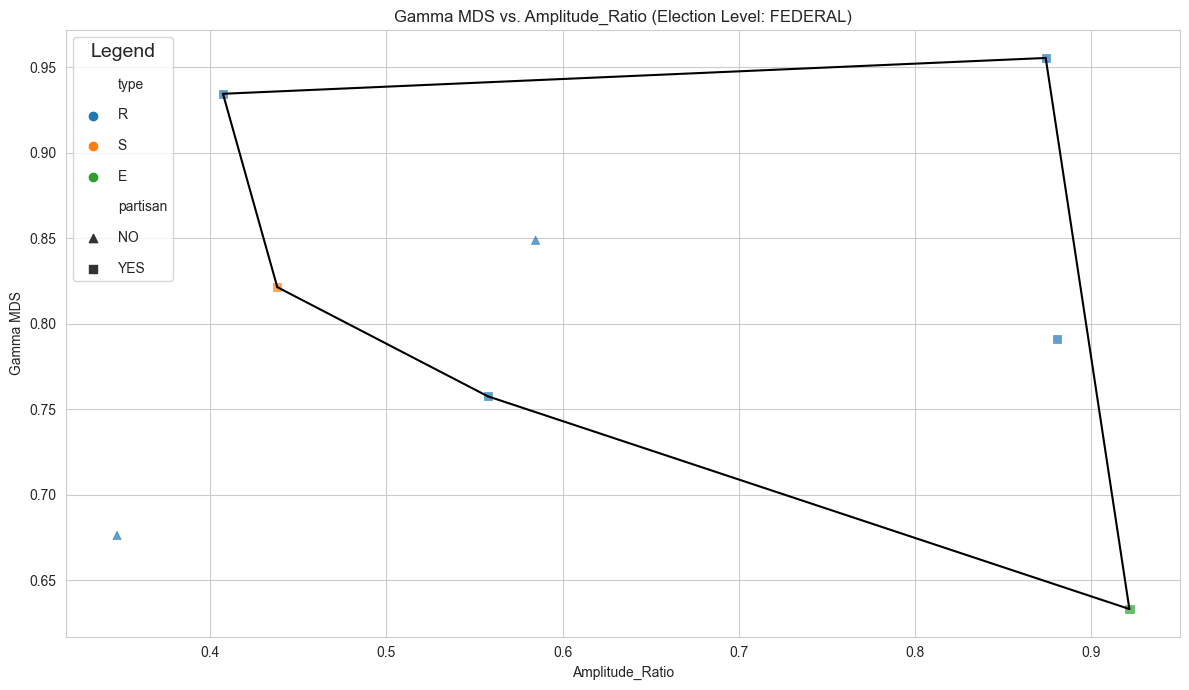

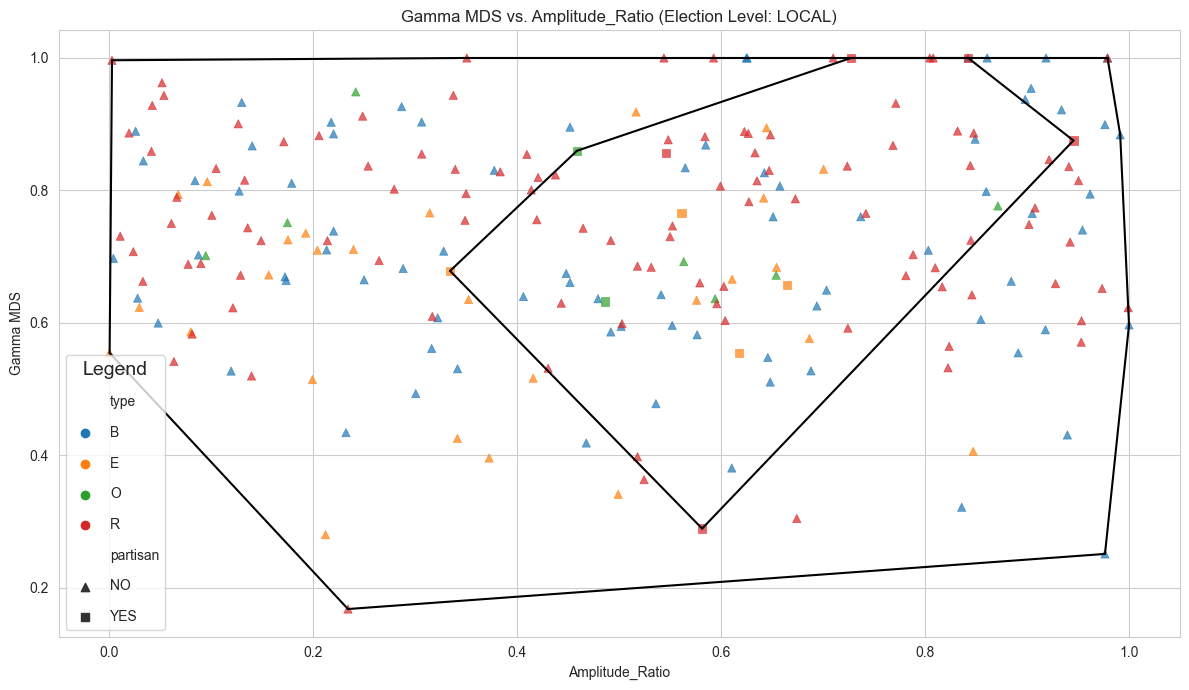

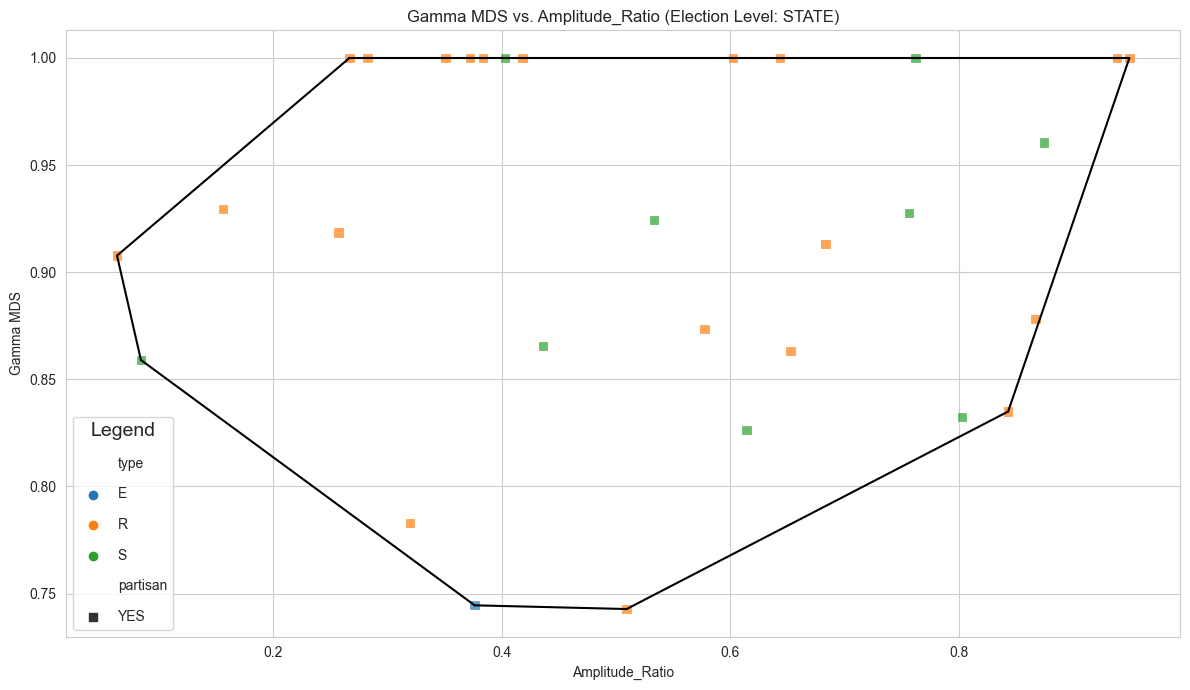

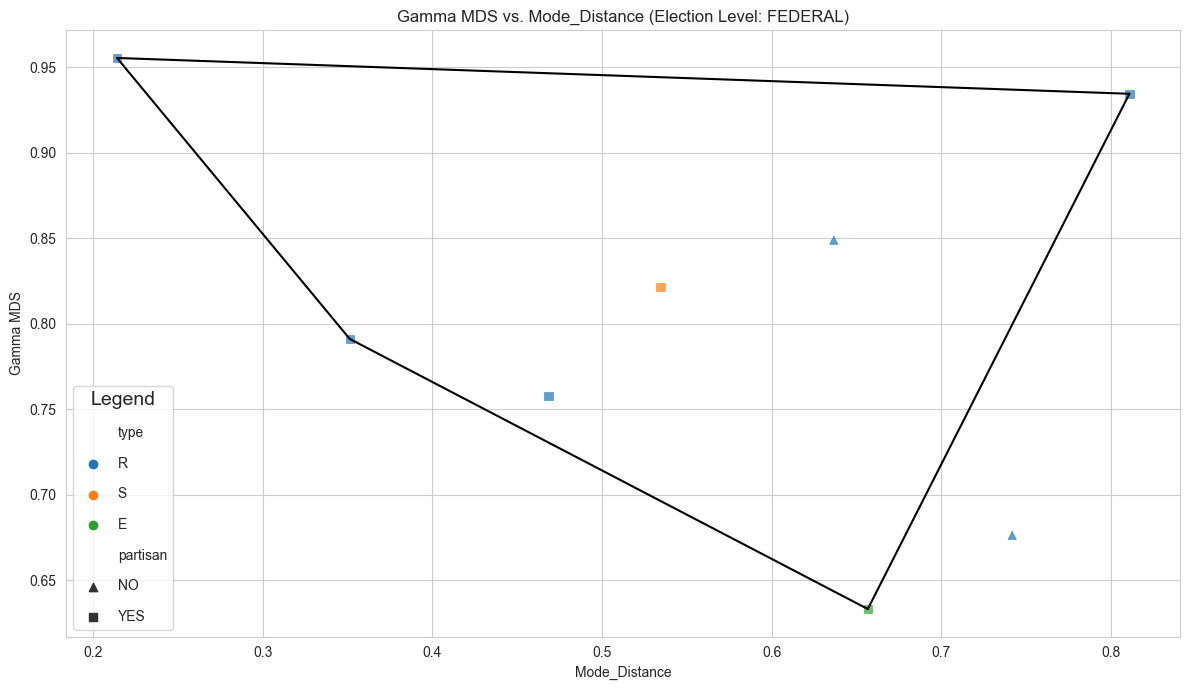

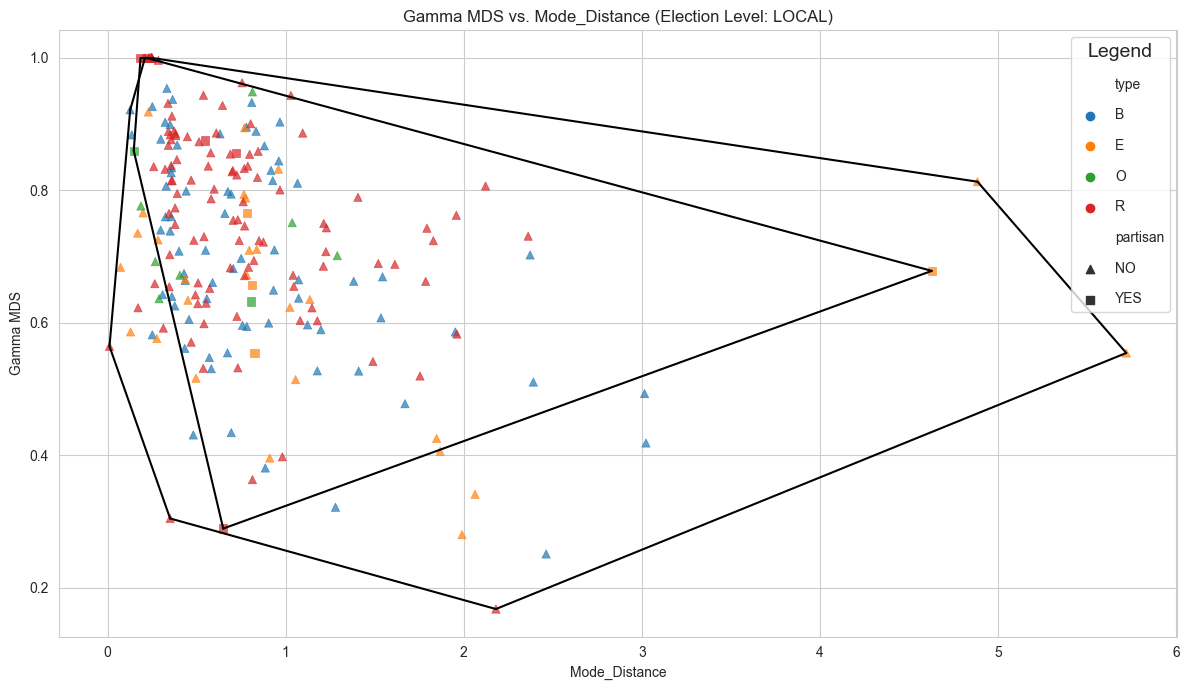

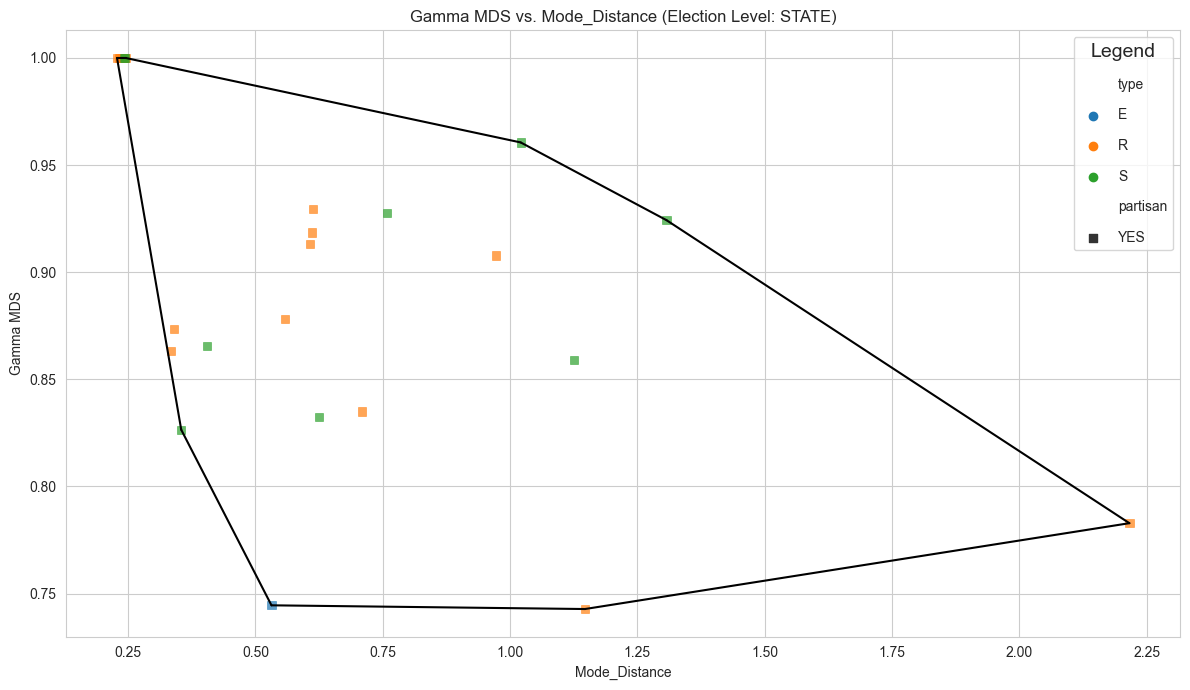

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull

# Load the data
updated_election_data = pd.read_csv('election_table.csv')

# Handle missing values
updated_election_data['level'].dropna(inplace=True)
updated_election_data['partisan'].dropna(inplace=True)
updated_election_data['Mode_Distance'].dropna(inplace=True) #! figure out why later 

# Define symbol dictionary for partisanship
partisan_symbols = {
    'YES': 's',
    'NO': '^',
}

# Get unique levels
unique_levels = updated_election_data['level'].unique()

# Set up the style for the plots
sns.set_style("whitegrid")

# Function to plot convex hull
def plot_convex_hull(data, measure):
    for partisan in data['partisan'].unique():
        subset = data[data['partisan'] == partisan].dropna(subset=[measure, 'gamma mds'])
        
        # Check if there are enough points to create a convex hull
        if subset.shape[0] >= 3:
            hull = ConvexHull(subset[[measure, 'gamma mds']].values)
            for simplex in hull.simplices:
                plt.plot(subset[measure].iloc[simplex], subset['gamma mds'].iloc[simplex], 'k-')

# Bimodality measures based on existing columns
potential_measures = ['Ashman_D', 'Sarle_coefficient', 'Hartigan_Dip', 'Amplitude_Ratio', 'Mode_Distance']

# Extract the measures present in the updated data
measures_present = [measure for measure in potential_measures if measure in updated_election_data.columns]

# Iterate over each bimodality measure and each election level to create the plots
for measure in measures_present:
    for level in unique_levels:
        subset_data = updated_election_data[updated_election_data['level'] == level]
        
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=subset_data, x=measure, y='gamma mds', hue='type', 
                        palette='tab10', style=subset_data['partisan'],
                        markers=partisan_symbols, alpha=0.7, edgecolor=None)
        
        # Plot convex hulls
        plot_convex_hull(subset_data, measure)
        
        # Set plot labels and title
        plt.title(f'Gamma MDS vs. {measure} (Election Level: {level})')
        plt.xlabel(measure)
        plt.ylabel('Gamma MDS')
        plt.legend(title='Legend', title_fontsize='14', labelspacing=1.2)
        plt.tight_layout()
        plt.show()